In [1]:
!pip uni
pip install MDO-outlier-detector==

You should consider upgrading via the '/home/jojo/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from outlier_detector.main import Mdo

In [3]:
from pathlib import Path
import os

path = Path('.').resolve()
path_root = path.parent
path_to_data = path_root.joinpath('test_data', 'mock.csv')

In [4]:
import seaborn as sns
import pandas as pd
import os 
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from outlier_detector.main import Mdo


Open = 'Open'
Close = 'Close'
Volume = 'Volume'

data_test = pd.read_csv(path_to_data)
X = data_test[[f'{Open}', f'{Close}']]

In [5]:
params = { 
    'inference_type': 'bayesian',
    "n_components": 10,
    "covariance_type": 'full'
    } ### Bayesian or Usual one GMM and Parameters of GMM Sklearn

outlier_detection = Mdo()

X_scoring = outlier_detection.transform(X, **params)

X_scoring

/home/jojo/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


,Open,Close,local_metrics,global_metrics
0,2889.750000,2889.669922,0.882011,1.497399e-10
1,2906.709961,2917.750000,0.683911,1.486899e-10
2,2920.550049,2926.459961,0.421963,1.152755e-10
3,2949.600098,2954.179932,0.172840,7.638269e-11
4,2952.709961,2950.459961,0.166902,6.813716e-11
...,...,...,...,...
249,3123.530029,3002.100098,1.803382,9.311946e-10
250,3071.040039,3041.310059,2.031732,2.387290e-10
251,2993.760010,3066.590088,1.583406,5.582305e-10
252,3131.000000,3124.739990,0.797861,1.770752e-10


#### OR

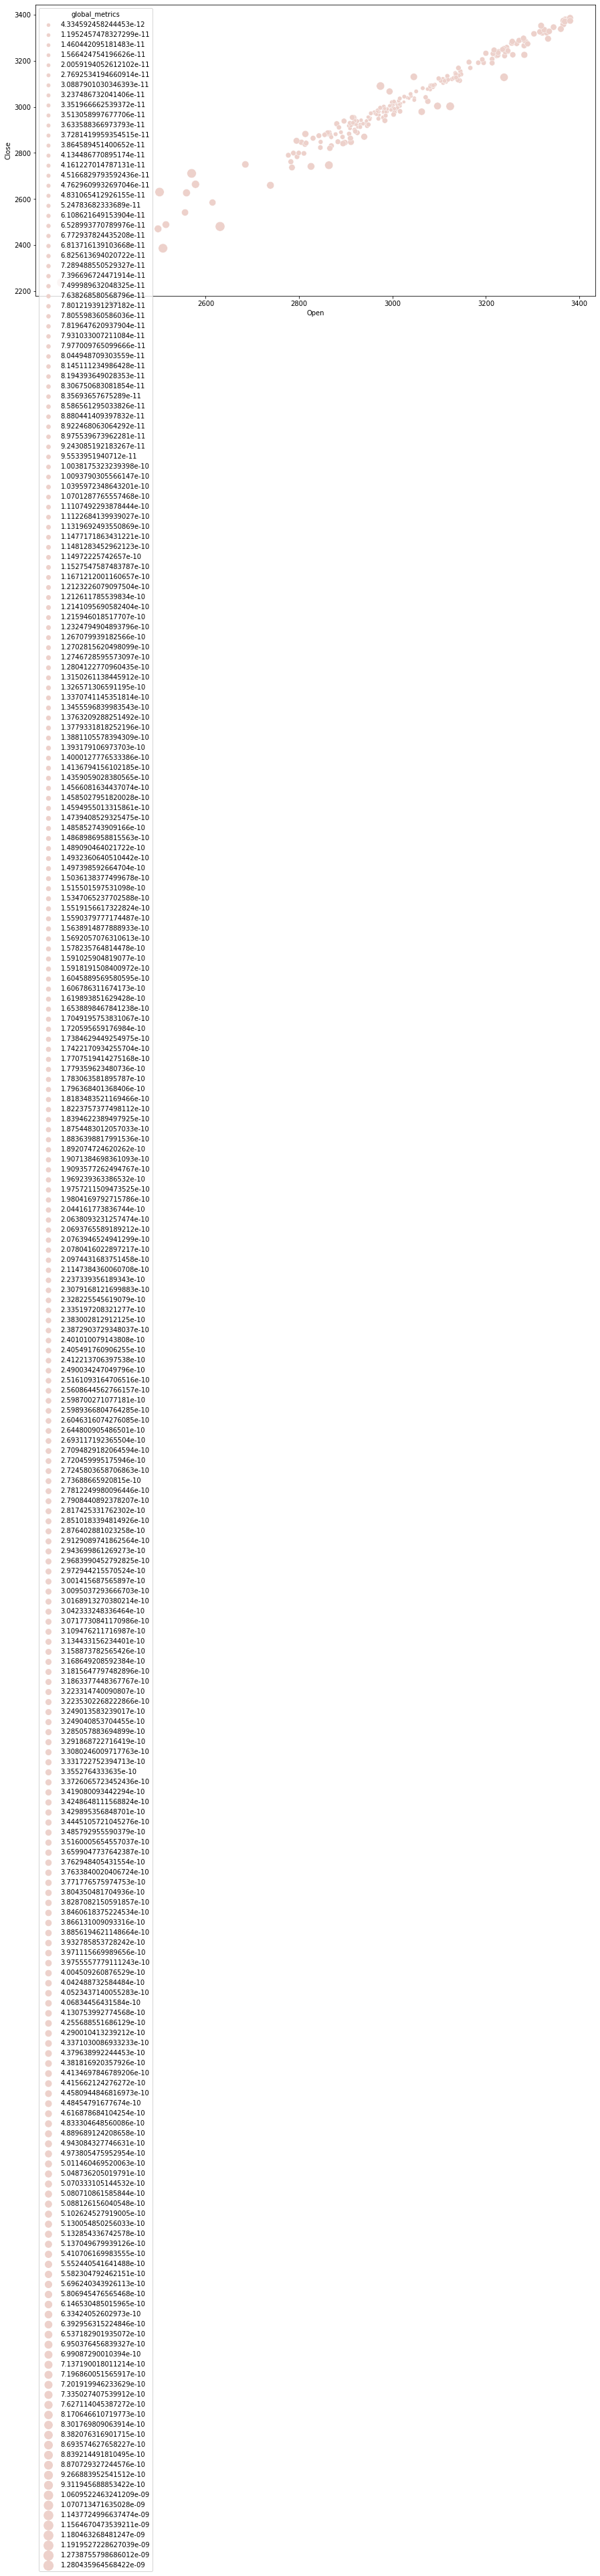

In [6]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,8))

cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=f"{Open}", y=f"{Close}",
                     hue="global_metrics", size="global_metrics",
                     sizes=(20, 200), hue_norm=(0, 7),
                     legend="full", data=X_scoring)

In [7]:
X_3D = data_test[[f'{Open}', f'{Close}', f'{Volume}']]

params = { 
    'inference_type': 'bayesian',
    "n_components": 10,
    "covariance_type": 'full'
    } ### Bayesian or Usual one GMM and Parameters of GMM Sklearn

outlier_detection = Mdo()

X_scoring = outlier_detection.transform(X_3D, **params)

X_scoring

,Open,Close,Volume,local_metrics,global_metrics
0,2889.750000,2889.669922,2810140000,1.813659,0.075706
1,2906.709961,2917.750000,3437620000,1.300731,0.060240
2,2920.550049,2926.459961,3287890000,0.900542,0.062706
3,2949.600098,2954.179932,3905940000,1.462291,0.051066
4,2952.709961,2950.459961,5000120000,1.165539,0.058287
...,...,...,...,...,...
249,3123.530029,3002.100098,7018890000,2.617708,0.230898
250,3071.040039,3041.310059,5832250000,0.474364,0.110567
251,2993.760010,3066.590088,5740660000,1.722119,0.065424
252,3131.000000,3124.739990,5829240000,0.640130,0.101994


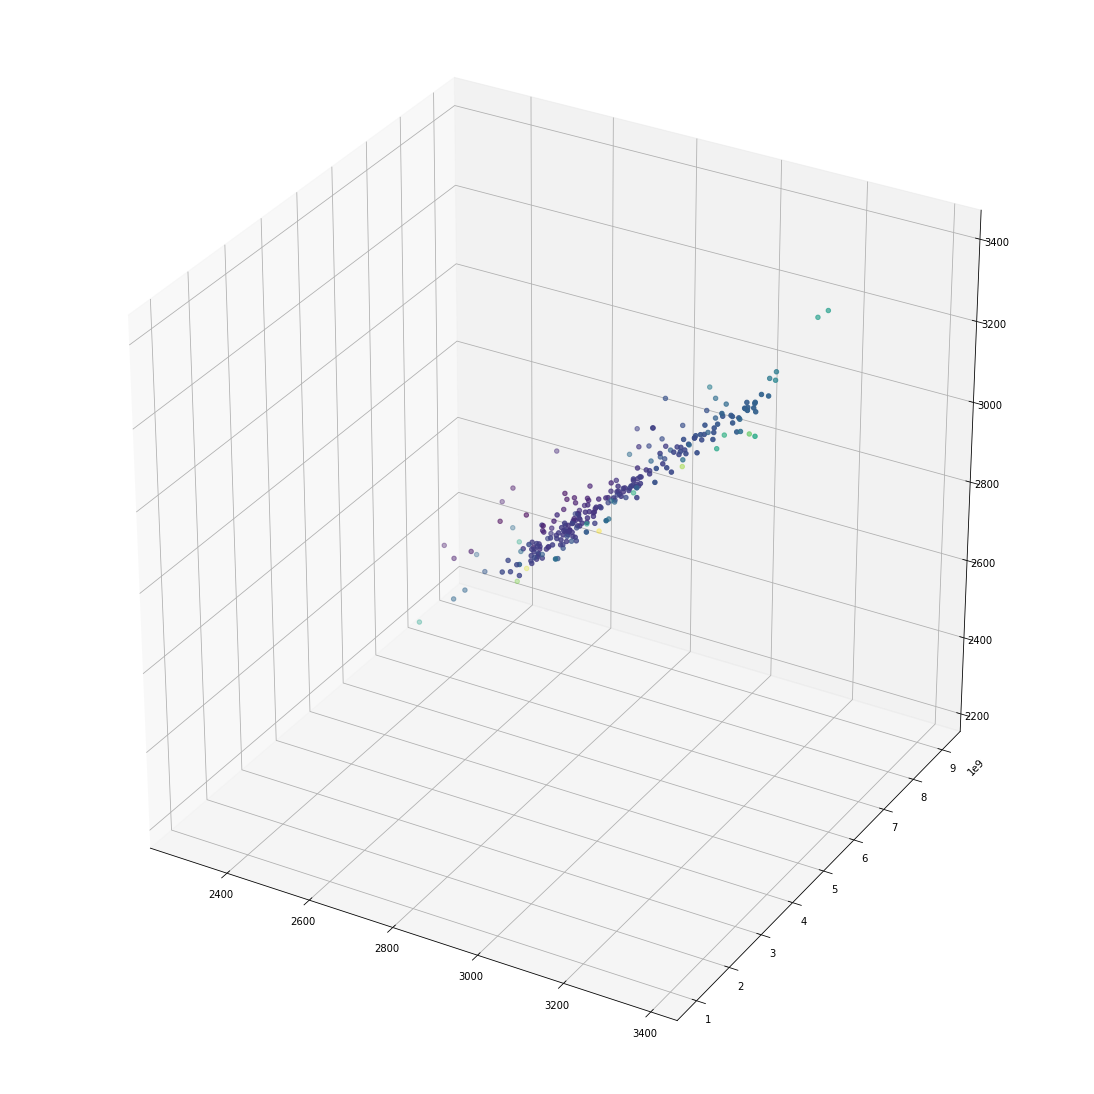

In [8]:
figsize=(15, 15)

fig = pyplot.figure(figsize=figsize)
ax = Axes3D(fig)

sequence_containing_x_vals = X_scoring.Open.to_list()
sequence_containing_y_vals = X_scoring.Volume.to_list()
sequence_containing_z_vals = X_scoring.Close.to_list()
color = X_scoring.global_metrics.to_list()

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals,
           sequence_containing_z_vals, c=color)

pyplot.show()